In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# inspiration: http://matplotlib.org/examples/api/two_scales.html

def plot_log_vggnet(log_file, title=None): 
    train_log_file = log_file + '.train'
    test_log_file = log_file + '.test'
    df_train = pd.read_table(train_log_file, sep = ',')
    df_test = pd.read_table(test_log_file, sep = ',')

    #print df_train.head()
    #print df_test.head()
    print 'Total Time:', df_train.Seconds.iloc[-1], 'seconds'
    print 'CV loss:', df_test['loss/loss'].iloc[-1], 'CV accuracy:', df_test['accuracy@1'].iloc[-1]

    ax1 = plt.subplot(111)
    ax1.plot(df_train['NumIters'],df_train['loss/loss'] , label = 'Train Loss')
    ax1.plot(df_test['NumIters'],df_test['loss/loss'] , label = 'CV Loss')
    ax1.grid()

    
    ax2 = ax1.twinx()
    ax2.plot(df_test['NumIters'],df_test['accuracy@1'] , label = 'CV Accuracy - top1', color='red')
    ax2.plot(df_test['NumIters'],df_test['accuracy@5'] , label = 'CV Accuracy - top5', color='pink')
    
    ax1.legend(loc=3, bbox_to_anchor=(1, 0.5))
    
    ax1.set_title(log_file)
    ax1.set_xlabel('num_iters')
    ax1.set_ylabel('loss')
    ax2.set_ylabel('accuracy')
    
    plt.show()

Total Time: 24876.945222 seconds
CV loss: 1.26847 CV accuracy: 0.710312


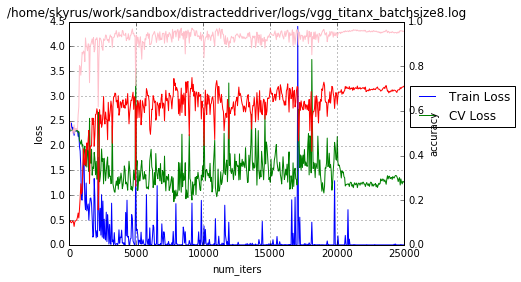

In [19]:
plot_log_vggnet('/home/skyrus/work/sandbox/distracteddriver/logs/vgg_titanx_batchsize8.log')